# Test Trained Landcover Network

In [1]:
from keras import Sequential
from keras.layers import InputLayer, Conv2D, MaxPooling2D, Dense, ReLU, Softmax, GlobalAveragePooling2D
from keras.optimizers import SGD
import scipy.io as sio
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

sns.set_style("whitegrid")

2023-09-02 12:59:14.340644: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# To avoid: 
# StdErr from Kernel Process OMP: Error #15: Initializing libiomp5md.dll, but found libiomp5 already initialized. 
# OMP: Hint This means that multiple copies of the OpenMP runtime have been linked into the program.

import os

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [3]:
satData = sio.loadmat("../data/satData.mat")
XTrain = satData["XTrain"]
XTest = satData["XTest"]
XVal = satData["XVal"]
YTrain = satData["YTrain"]
YTest = satData["YTest"]
YVal = satData["YVal"]

XTrain = XTrain.transpose([3, 0, 1, 2])
XTest = XTest.transpose([3, 0, 1, 2])
XVal = XVal.transpose([3, 0, 1, 2])
YTrain = YTrain.T
YTest = YTest.T
YVal = YVal.T

In [4]:
model = Sequential([InputLayer(input_shape=(28, 28, 4)), 
                    Conv2D(filters=20, kernel_size=(3, 3)), 
                    ReLU(), 
                    MaxPooling2D(pool_size=(3, 3), strides=(1, 1)), 
                    GlobalAveragePooling2D(),
                    Dense(units=6), 
                    Softmax()])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 20)        740       
                                                                 
 re_lu (ReLU)                (None, 26, 26, 20)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 20)       0         
 )                                                               
                                                                 
 global_average_pooling2d (G  (None, 20)               0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 6)                 126       
                                                                 
 softmax (Softmax)           (None, 6)                 0

2023-09-02 12:59:20.722839: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-02 12:59:20.723948: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
optimizer = SGD(learning_rate=0.0001)
loss = tf.keras.losses.CategoricalCrossentropy()
metrics = tf.keras.metrics.CategoricalAccuracy()
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(XTrain, YTrain, epochs=25, batch_size=64, verbose="auto")

Epoch 1/25
47/47 [==============================] - 3s 52ms/step - loss: 16.6039 - categorical_accuracy: 0.2273
Epoch 2/25
47/47 [==============================] - 3s 69ms/step - loss: 3.4537 - categorical_accuracy: 0.4727
Epoch 3/25
47/47 [==============================] - 3s 68ms/step - loss: 2.2150 - categorical_accuracy: 0.5590
Epoch 4/25
47/47 [==============================] - 3s 62ms/step - loss: 2.0773 - categorical_accuracy: 0.5963
Epoch 5/25
47/47 [==============================] - 2s 53ms/step - loss: 1.4237 - categorical_accuracy: 0.6797
Epoch 6/25
47/47 [==============================] - 3s 61ms/step - loss: 1.1613 - categorical_accuracy: 0.7190
Epoch 7/25
47/47 [==============================] - 3s 65ms/step - loss: 0.9466 - categorical_accuracy: 0.7483
Epoch 8/25
47/47 [==============================] - 4s 79ms/step - loss: 1.2374 - categorical_accuracy: 0.7077
Epoch 9/25
47/47 [==============================] - 3s 67ms/step - loss: 0.9076 - categorical_accuracy: 0.7557


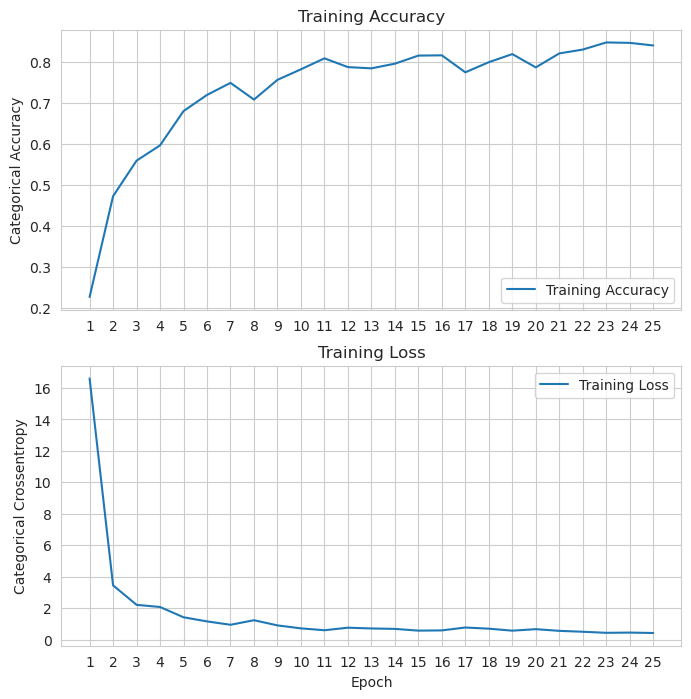

In [6]:
acc = history.history['categorical_accuracy']
loss = history.history['loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Categorical Accuracy')
plt.title('Training Accuracy')
plt.xticks(range(len(acc)), range(1, len(acc)+1))

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.legend(loc='upper right')
plt.ylabel('Categorical Crossentropy')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.xticks(range(len(loss)), range(1, len(loss)+1))

plt.show()

The test data is stored in a variable XTest, and the corresponding labels are in YTest.
We can use the [predict()](https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict) function to make predictions with our network.

In [7]:
predictions = model.predict(XTest, verbose=False)

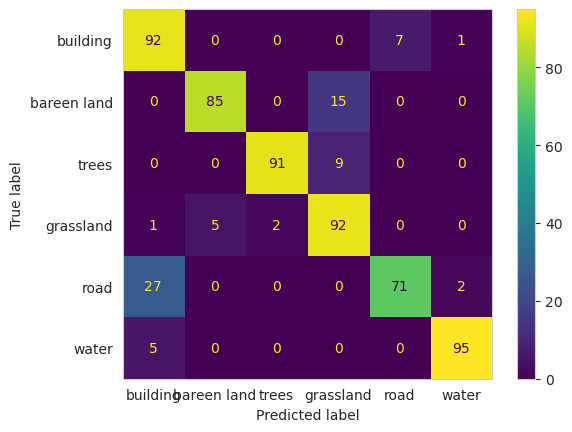

In [8]:
cm = confusion_matrix(tf.argmax(YTest, axis=-1), tf.argmax(predictions, axis=-1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["building", "bareen land", "trees", "grassland", "road", "water"])
disp.plot()
plt.grid(False)
plt.show()